## 2️⃣ Exploratory Data Analysis (EDA)
<!-- **Designed by:** [datamover.ai](https://www.datamover.ai) -->

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

# Set random seed
np.random.seed(42)

**1. Load the train set and sample the dataset to a manageable size if necessary**

This [article](https://www.kaggle.com/code/alexisbcook/data-leakage) explained the necessity to perform EDA on train set only, preventing from data leakage.

In [5]:
# Load data: 
df_train = pd.read_csv("./data/data_train.csv")

# Similarly, before proceeding to the task, visualise the size of dataset and inspect storage
size_b = df_train.memory_usage(deep=True).sum()  # get size in byte
size_mb = size_b / (1024 * 1024)  # convert byte to mb
print(f"Size data: {size_mb:.2f} Mb")

Size data: 0.10 Mb


In [6]:
# Display train set data table: 
print(df_train.shape)
df_train.head(3)

(554, 7)


,Price,Address,Zip,Area,Room,Lon,Lat
0,635000.0,"Niersstraat 35 HS, Amsterdam",1078 VH,81,3,4.894509,52.343016
1,400000.0,"Jan van Riebeekstraat 3 1, Amsterdam",1057 ZW,61,2,4.858697,52.370661
2,695000.0,"Da Costakade 171 III, Amsterdam",1053 WX,88,3,4.874092,52.367502


In [7]:
# Inspect train set data structure,  
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    552 non-null    float64
 1   Address  554 non-null    object 
 2   Zip      554 non-null    object 
 3   Area     554 non-null    int64  
 4   Room     554 non-null    int64  
 5   Lon      554 non-null    float64
 6   Lat      554 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 30.4+ KB


**2. For supervised learning tasks, identify the target attribute(s)**

In [1]:
Y_target = "Price"

In [7]:
# predictors = df_train[df_train.columns[1:7]] 
# predictors.columns

**3. Study each attribute and its characteristics:**

**3 a. Name**

In [8]:
df_train.columns

Index(['Price', 'Address', 'Zip', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

**3 b. For tabular data, define the data type of each variable, namely:**

- `Nominal`: Named categories, e.g., `gender : ['Female', 'Male']`
- `Ordinal`: Categories with an implied order, e.g. `quality : [Low, Medium, High]`
- `Discrete`: Only particular numbers, e.g., `age: {1,2,3,...,58,59,60}`
- `Continuous`: Any numerical value, e.g. `weight: {38.9,45.5}`
    
📝 Nominal and ordinal data types are considered qualitative (**categorical**) features, whereas discrete and continuous data types are considered numerical (**quantitative**) features.

In [9]:
df_train.head()

,Price,Address,Zip,Area,Room,Lon,Lat
0,635000.0,"Niersstraat 35 HS, Amsterdam",1078 VH,81,3,4.894509,52.343016
1,400000.0,"Jan van Riebeekstraat 3 1, Amsterdam",1057 ZW,61,2,4.858697,52.370661
2,695000.0,"Da Costakade 171 III, Amsterdam",1053 WX,88,3,4.874092,52.367502
3,1050000.0,"Koninginneweg 158 4, Amsterdam",1075 EE,119,5,4.860818,52.352776
4,300000.0,"Willem Leevendstraat 1 1, Amsterdam",1055 KB,54,2,4.846858,52.384197


In [10]:
# create a dataframe with dictionary, by specifying the data type of each variable 
df_datatype = pd.DataFrame.from_dict(
    {
        "Price": "continuous",  # <- This is the TARGET variable
        "Address": "nominal",   # <- contains repeat values 
        "Zip": "nominal",       # <- contains repeat values 
        "Area": "continuous",   # despite numeric nature, this variable can transfer into categorical (ordinal)values 
        "Room": "discrete",
        "Lon": "continuous",
        "Lat": "continuous",
    },
    orient="index",
    columns=["data_type"],
)

df_datatype.transpose()       # transposed vector to keep this notebook tidy 

,Price,Address,Zip,Area,Room,Lon,Lat
data_type,continuous,nominal,nominal,continuous,discrete,continuous,continuous


3b.1 Exploring numeric variables (i.e., continous)

In [11]:
# Summary descriptive statistic for continous variables 
df_train.nunique(axis=0)
df_train.describe().apply(lambda s: s.apply(lambda x: format(x, '.3f')))

#from a glance of variable count, it appears to have missing data in Target variable (i.e., Price)

,Price,Area,Room,Lon,Lat
count,552.000,554.000,554.000,554.000,554.000
mean,611200.743,94.700,3.527,4.887,52.364
std,516752.981,55.055,1.519,0.053,0.024
min,175000.000,21.000,1.000,4.655,52.292
25%,350000.000,60.000,3.000,4.854,52.352
50%,462000.000,82.000,3.000,4.887,52.364
75%,695000.000,111.000,4.000,4.921,52.378
max,5950000.000,497.000,14.000,5.029,52.424


3b.2 Exploring variables that were stored as string objects 

In [81]:
# inspect for string variables 
print(f"Address: \
      { 100*len(df_train['Address'].unique())/len(df_train['Address']):.2f}% were unique values ({len(df_train['Address'].unique())} out of {len(df_train['Address'])} total values)")

print(f"Zip: \
      { 100*len(df_train['Zip'].unique())/len(df_train['Zip']):.2f}% were unique values ({len(df_train['Zip'].unique())} out of {len(df_train['Zip'])} total values)")


Address:       99.64% were unique values (552 out of 554 total values)
Zip:       93.32% were unique values (517 out of 554 total values)


In [21]:
    # display categorical values that shown repeatedly in the dataset
    # the output indicated interesting patterns that 
    # proportionate of houses on sale were concentrated in certain zip areas / sharing same addresses
cat_data = df_train.select_dtypes(include=['object'])
cat_data.value_counts().reset_index(name="count").query("count > 1")

    # Zip concentration in details: 
# df_train['Zip'].value_counts().reset_index(name="count").query("count > 1")

    # breakdown to address, zip concentration respectively:
# for colname in cat_data.columns:
#     print (colname)
#     print (df_train[colname].value_counts(), '\n')

,Address,Zip,count
0,"Uilengouw 2, Amsterdam",1027 EZ,2
1,"Huidekoperstraat 24 F, Amsterdam",1017 ZM,2


**3 c. Percentage of missing values, namely** `np.NaN` 
- [missingno](https://github.com/ResidentMario/missingno) can be a useful tool for visualization;
- Ensure that missing values are not encoded in a specific ways, e.g. `-1`, `"?"`
- Inspect rows with missing values to assess if a specific pattern exists. 

<!-- Missingo example -->
<!-- # import missingno as msno
# %matplotlib inline
# msno.matrix(df_train.sample(df_train.shape[0]))

# # msno.bar(df_train.sample(len(df_train))) -->

In [67]:
print(f"{df_train.isna().sum().sum()} missing values from train set\
      ({df_train.isna().sum().sum()/df_train.shape[0]*df_train.shape[1]:.2f}%) ")

missing = pd.DataFrame(df_train.isna().any(), columns=['Contains_missing'])

missing.replace({True: 'Yes',
                False: 'No'
                 }, inplace=True)

missing_count= pd.DataFrame(df_train.isna().sum(), columns=['Missing_Counts'])

df_missing = missing.merge(missing_count, how ='outer', left_index= True, right_index= True)
df_missing.reset_index(inplace=True)
df_missing.rename(columns={'index': 'col_name'}, inplace= True)
df_missing.set_index("col_name", inplace= True)
df_missing.transpose()

2 missing values from train set      (0.03%) 


col_name,Price,Address,Zip,Area,Room,Lon,Lat
Contains_missing,Yes,No,No,No,No,No,No
Missing_Counts,2,0,0,0,0,0,0


In [73]:
# print samples with missing values
display(df_train[df_train.isna().any(axis=1)])

,Price,Address,Zip,Area,Room,Lon,Lat
271,NaN,"Zeeburgerkade 760, Amsterdam",1019 HT,107,3,4.945022,52.369244
408,NaN,"Suikerplein 16, Amsterdam",1013 CK,81,3,4.880976,52.389623


All missing values from train set are on the target `Price`

**3 d. Check if there are any duplicates and inspect them;**

In [79]:
# check if there are duplicated rows in the dataset
print( f" {df_train.duplicated().sum()} duplicate values from train set ({df_train.duplicated().sum()/len(df_train):.3f}%) "
)

 0 duplicate values from train set (0.000%) 


* There are other method such as detecting similar features via [fastML package](https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b) has been suggested for duplicate handling prior to model selection. 

* Given the limited variables included in current dataset, as well as descriptive statistics showed above, I decided not to include further test for this. 



**3 e. Noisiness and type of noise e.g. stochastic, rounding errors, etc.** (might require business knowledge)


In [94]:
# Let us assume that we have noise-free features
df_type_noise = pd.DataFrame(
    data={"type of noise": len(df_train.columns)* ["noise-free"]}, index=df_train.columns
)
df_type_noise.transpose()

,Price,Address,Zip,Area,Room,Lon,Lat
type of noise,noise-free,noise-free,noise-free,noise-free,noise-free,noise-free,noise-free


### ! Pick up here!

In [88]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(df):
    #define a list to accumlate anomalies
    anomalies = []
  
    # Set upper and lower limit to 3 standard deviation
    attributes_std = np.std(df)
    attributes_mean = np.mean(df)
    anomaly_cut_off = attributes_std * 3

    lower_limit  = attributes_mean - anomaly_cut_off 
    upper_limit = attributes_mean + anomaly_cut_off


    # Generate outliers
    for outlier in df:
        
        if (outlier > upper_limit) or (outlier < lower_limit): 
            anomalies.append(outlier)
    return anomalies


In [90]:
find_anomalies(df_train.Area)

[273, 394, 374, 497, 387, 374, 467]

In [87]:
# print(f"Price mean: {round(np.mean(attributes.Price),2)}; Price SD: {round(np.std(attributes.Price),2)} ")
# print(f"{len(find_anomalies(attributes.Price))} Price extreme values: {find_anomalies(attributes.Price)}")

# print(f"Area mean: {round(np.mean(attributes.Area),2)}; Area SD: {round(np.std(attributes.Area),2)} ")
# print(f"{len(find_anomalies(attributes.Area))} Area extreme values: {find_anomalies(attributes.Area)}")

# print(f"Room mean: {round(np.mean(attributes.Room),2)}; Room SD: {round(np.std(attributes.Room),2)} ")
# print(f"{len(find_anomalies(attributes.Room))} Room extreme values: {find_anomalies(attributes.Room)}")

# print(f"price_per_area mean: {round(np.mean(attributes.price_per_area),2)}; price_per_area SD: {round(np.std(attributes.price_per_area),2)} ")
# print(f"{len(find_anomalies(attributes.price_per_area))} price_per_area extreme values: {find_anomalies(attributes.price_per_area)}")

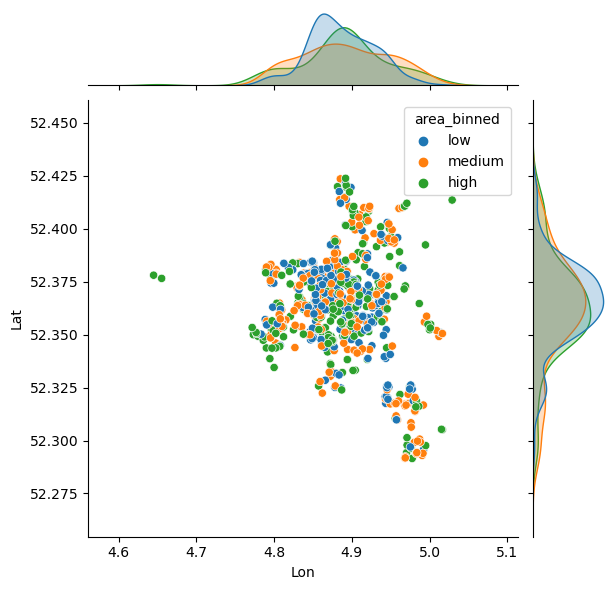

In [ ]:
#https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html
sns.jointplot(x="Lon", y="Lat", data=attributes,  hue="area_binned");

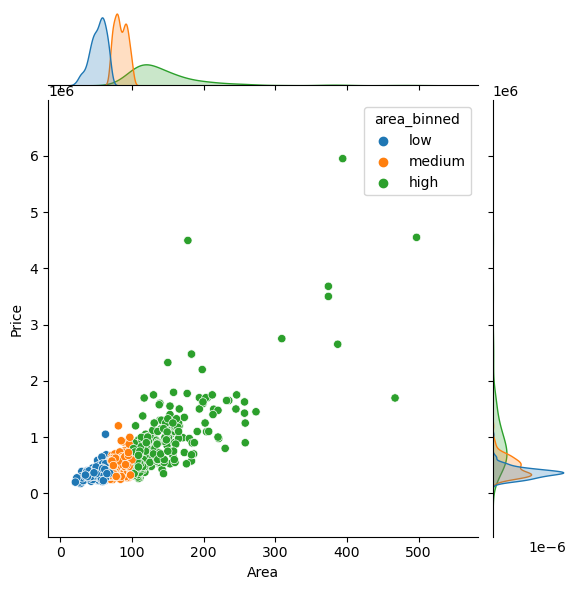

In [ ]:
sns.jointplot(x="Area", y="Price", data=attributes,  hue="area_binned");

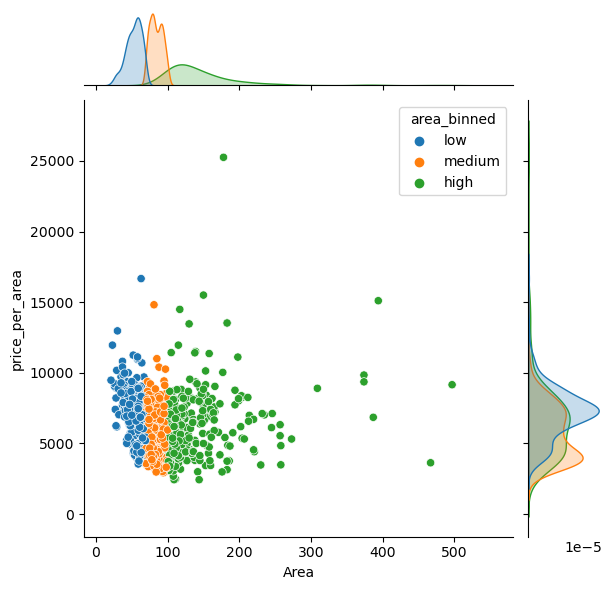

In [ ]:
sns.jointplot(x="Area", y="price_per_area", data=attributes,  hue="area_binned");

In [ ]:
#aims to map observations on map data, but didnt manage to make these packages work. need to check again 

# %matplotlib inline

# import contextily as cx
# import geopandas
# import rasterio
# from rasterio.plot import show as rioshow
# import matplotlib.pyplot as plt

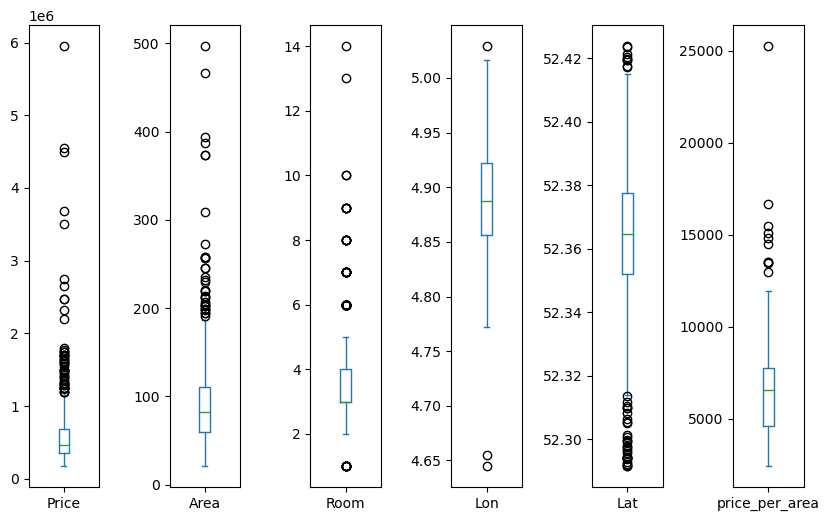

In [ ]:
# https://stackoverflow.com/questions/60015020/draw-subplots-boxplot-using-python [need to fix it with sns subplot to present nicer]
#alternatively rescale to make plots altogether-- within same plot

attributes.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=1) 
plt.show()

In [ ]:
# numeric_data = attributes.select_dtypes(include=np.number)

#decided to only visualise seperately as the measures are not in the same scale. 
#possible need to remove 1% quantile for normal analysis, but for ML training I am not sure if it would yield to lose of information 

# sns.boxplot(data=attributes['Price'])


In [ ]:
# sns.boxplot(data=attributes['price_per_area'])


In [ ]:
# sns.boxplot(data=attributes['Area'])

In [ ]:
# sns.boxplot(data=attributes['Room'])

**3 f. The frequency of each group within categorical variables and the type of distribution for numerical variables** 

Refer to this [link](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm) for common types of distributions. It is recommended to visualise each variable by using:
- a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for categorical variables;
- a [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) for numerical variables.

https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

https://www.kdnuggets.com/2021/09/determine-best-fitting-data-distribution-python.html  # from distfit import distfit

In [ ]:
# from scipy import stats
# from fitter import Fitter, get_common_distributions, get_distributions
# import scipy.stats as st

# def get_best_distribution(attributes):
#     dist_names = ["norm", "expon", "lognorm","beta", "weibull_min", "pareto", "genextreme"]
#     dist_results = []
#     params = {}
#     for dist_name in dist_names:
#         dist = getattr(st, dist_name)
#         param = dist.fit(attributes)

#         params[dist_name] = param
#         # Applying the Kolmogorov-Smirnov test
#         D, p = st.kstest(attributes, dist_name, args=param)
#         print("p value for "+dist_name+" = "+str(p))
#         dist_results.append((dist_name, p))

#     # select the best fitted distribution
#     best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
   
#     # store the name of the best fit and its p value
#     print("Best fitting distribution: "+str(best_dist))
#     print("Best p value: "+ str(best_p))
#     print("Parameters for the best fit: "+ str(params[best_dist]))

#     return best_dist, best_p, params[best_dist]


In [ ]:
# hist_col = attributes.select_dtypes([np.int, np.float]) #get numeric columns only 

# print(f"Best distribution for {hist_col['Price']} is: {get_best_distribution(hist_col['Price'])} ")
# print(f"Best distribution for {hist_col['Area']} is: {get_best_distribution(hist_col['Area'])} ")
# print(f"Best distribution for {hist_col['Room']} is: {get_best_distribution(hist_col['Room'])} ")
# print(f"Best distribution for {hist_col['Lon']} is: {get_best_distribution(hist_col['Lon'])} ")
# print(f"Best distribution for {hist_col['Lat']} is: {get_best_distribution(hist_col['Lat'])} ")

In [ ]:
# will fix the for loop later, seems taking ages...

# from scipy import stats
# from fitter import Fitter, get_common_distributions, get_distributions
# import scipy.stats as st

# def best_distribution(data):
#     f = Fitter(data,
#                 distributions= get_common_distributions())
#     f.fit()
#     f.summary()
#     return f.get_best(method = 'bic')

# for column in hist_col: 
#     dist_output = hist_col.apply(lambda x: best_distribution(x[column]),axis=1)
    
#     print (f"Best fit distribution for {hist_col[column]} is: {dist_output[column]}")

In [ ]:
hist_col = attributes.select_dtypes([np.int, np.float]) #get numeric columns only 

f = Fitter(hist_col.Price,
                distributions= get_common_distributions())
f.fit()
f.summary()

/var/folders/m6/h_c6j54j54723kby9c10j_0m0000gn/T/ipykernel_6427/578539684.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hist_col = attributes.select_dtypes([np.int, np.float]) #get numeric columns only
/var/folders/m6/h_c6j54j54723kby9c10j_0m0000gn/T/ipykernel_6427/578539684.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated i

NameError: name 'Fitter' is not defined

In [ ]:
f.get_best(method = 'bic')

{'lognorm': {'s': 0.786785215818731,
  'loc': 160364.88090369425,
  'scale': 319141.6787950195}}

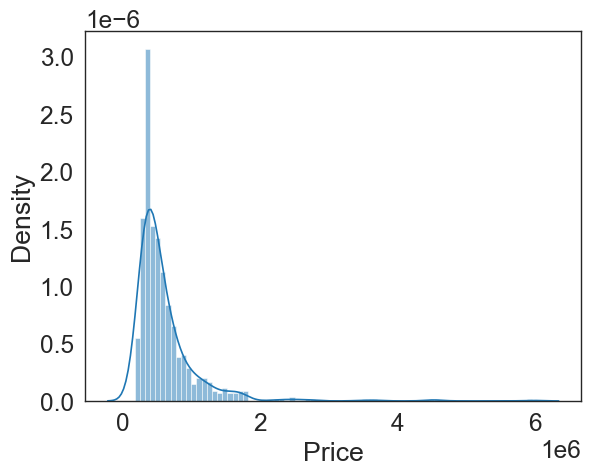

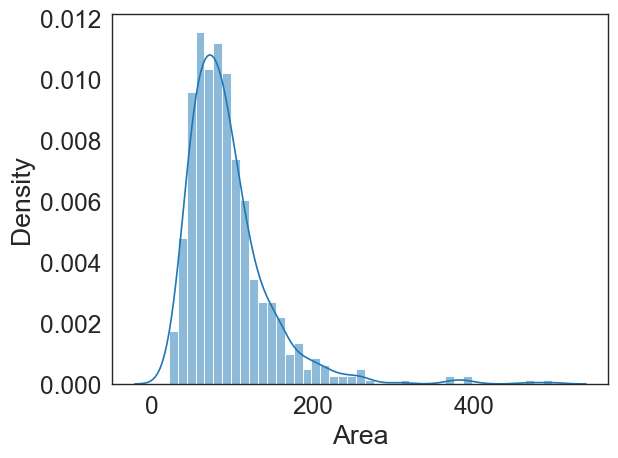

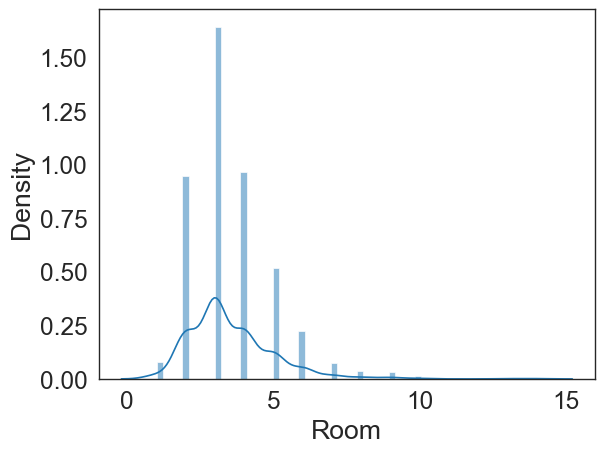

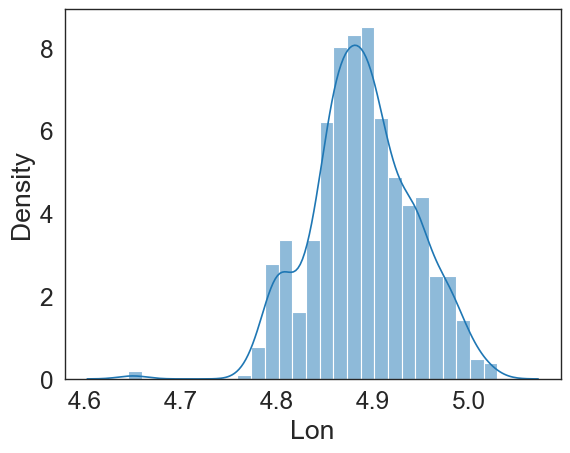

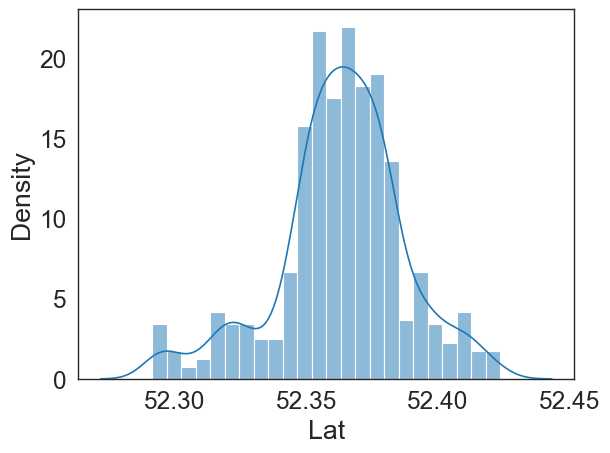

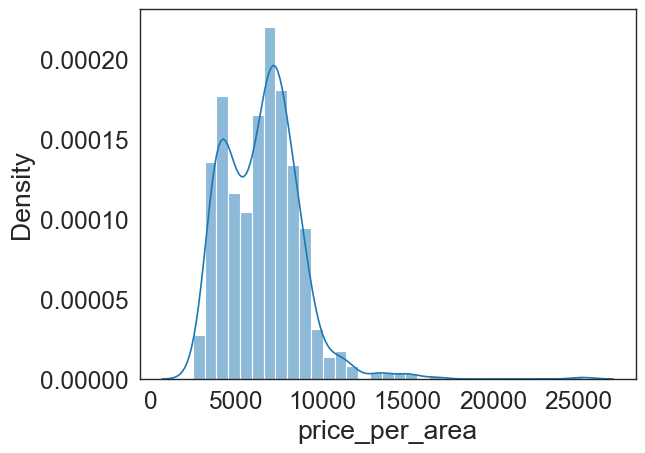

In [ ]:
# visualisation -- fitting empirical distribution (dont think it is necessary here)
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

hist_col = attributes.select_dtypes([np.int, np.float])

for i, col in enumerate(hist_col.columns):
     plt.figure(i)
     sns.histplot(hist_col[col], stat='density', kde=True,kde_kws={"cut": 3})


Visualize `nominal` variables

In [ ]:
# this dataset did not involve nominal variables 

Visualize `ordinal` variables

<AxesSubplot:xlabel='area_binned', ylabel='count'>

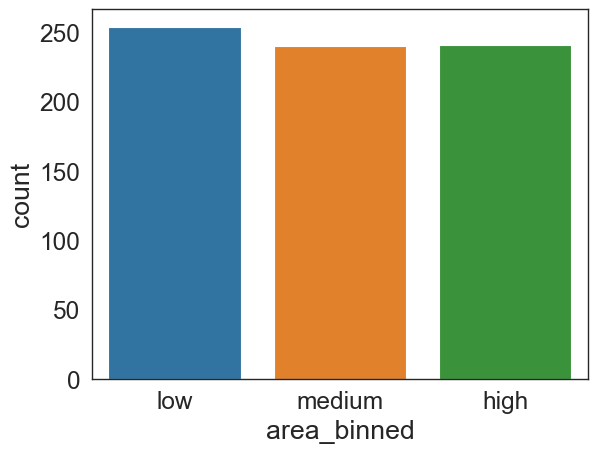

In [ ]:
sns.countplot(x=attributes["area_binned"])

<AxesSubplot:xlabel='area_binned', ylabel='Price'>

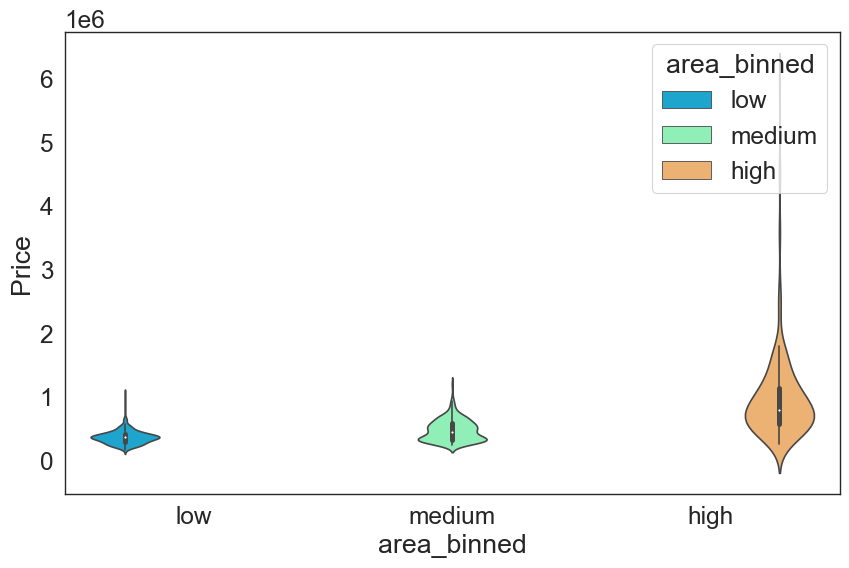

In [ ]:
#plotted with volin plots to reveal additional information, and the visualisation consistently showed larger properties seems having more extreme values 
plt.figure(figsize=(10,6))
sns.violinplot(x='area_binned',y="Price",data=attributes, hue='area_binned', palette='rainbow')

<AxesSubplot:xlabel='area_binned', ylabel='price_per_area'>

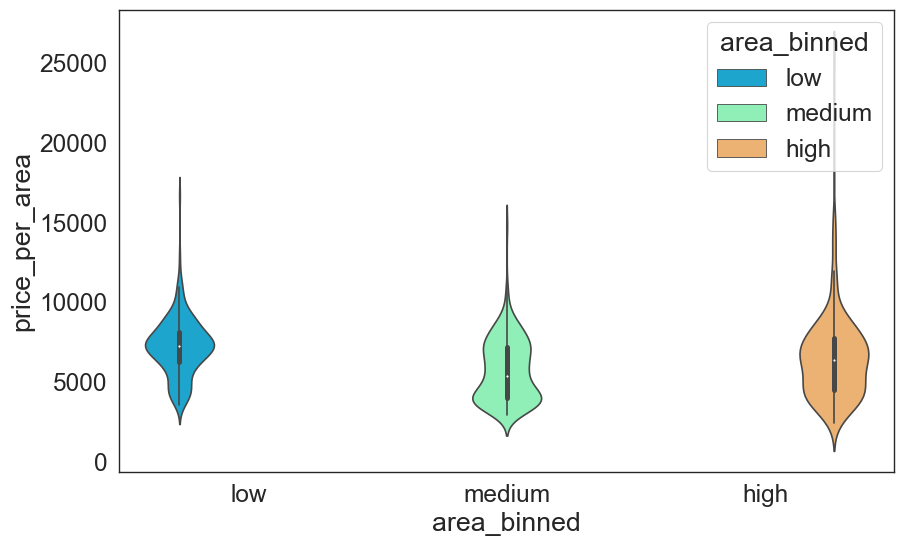

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='area_binned',y="price_per_area",data=attributes, hue='area_binned', palette='rainbow')

Visualize `discrete` and `continuous` variables together

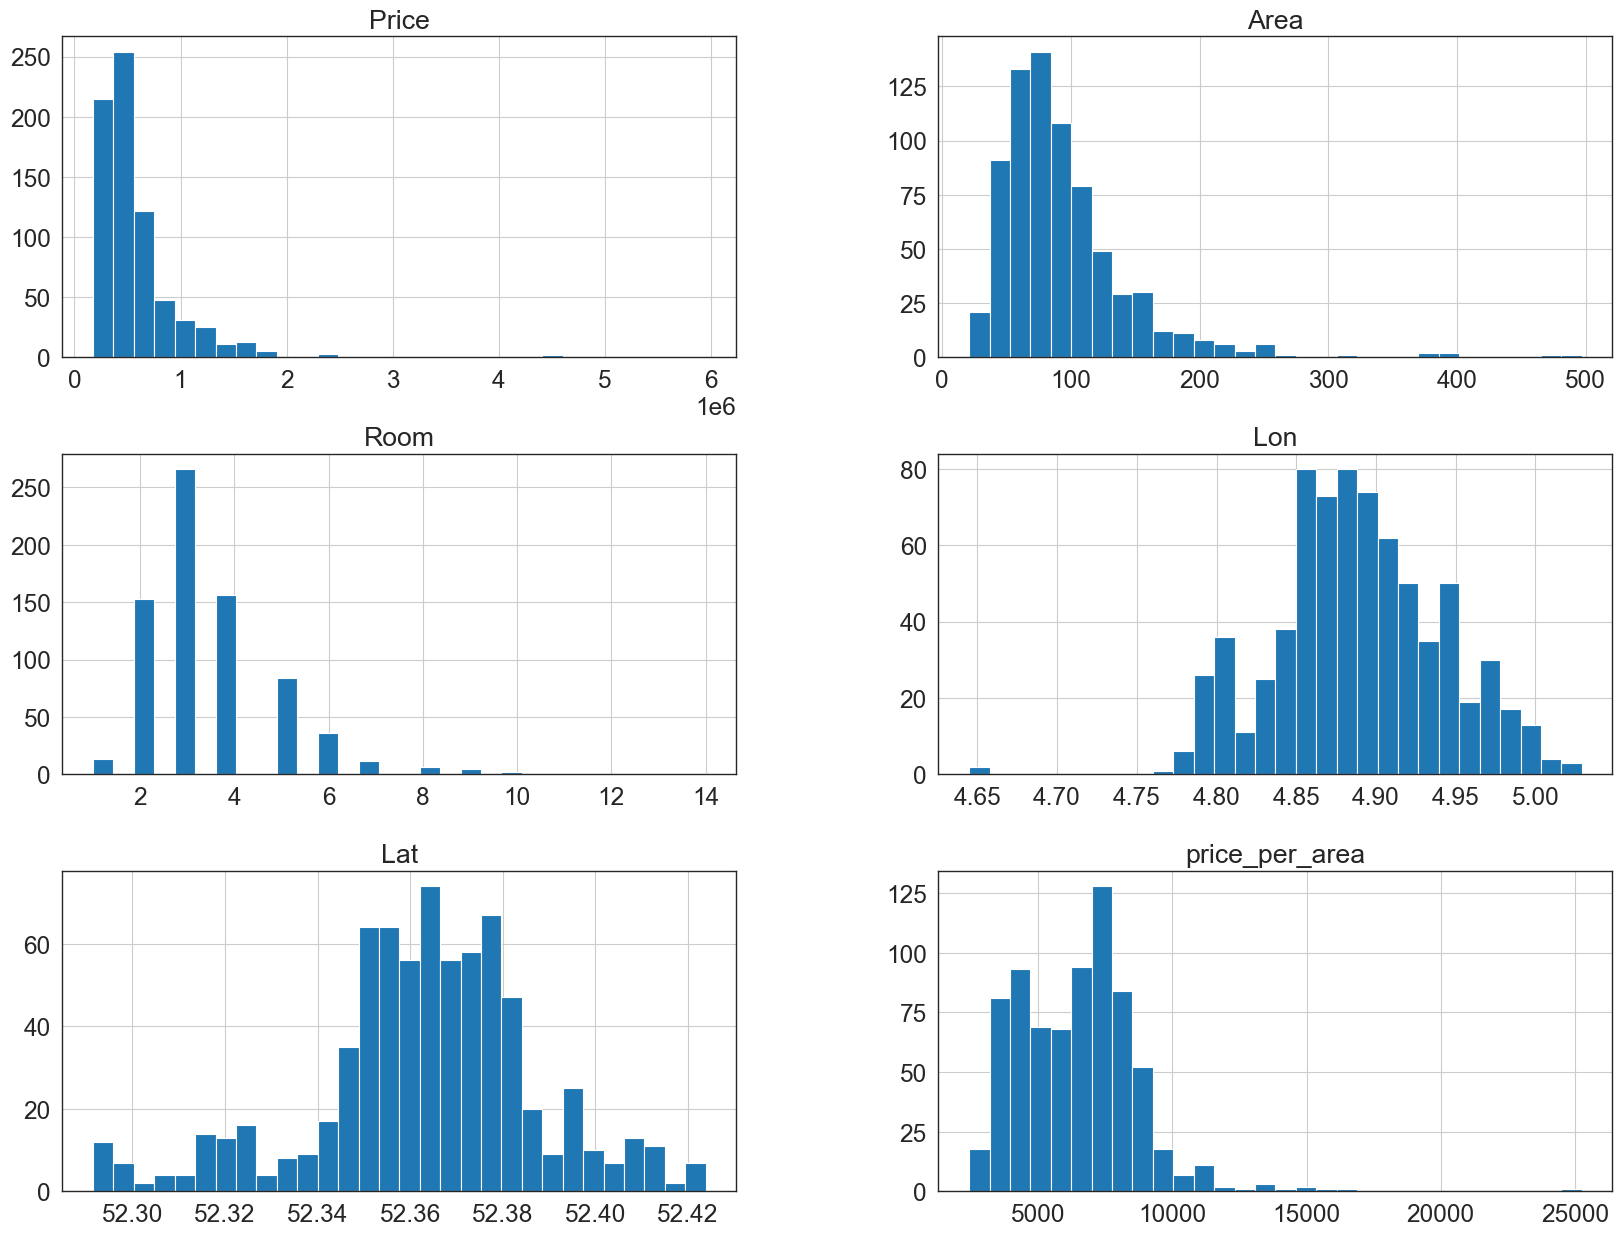

In [ ]:
# visualise the data by checking histogram of numeric columns 

%matplotlib inline
import matplotlib.pyplot as plt
attributes.hist(bins=30, figsize=(20,15))
plt.show()

**3. g Examine possible outliers in numerical variables and check whether they make sense (might require business knowledge).** 

For details on identifying outliers, refer to this [link](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/).

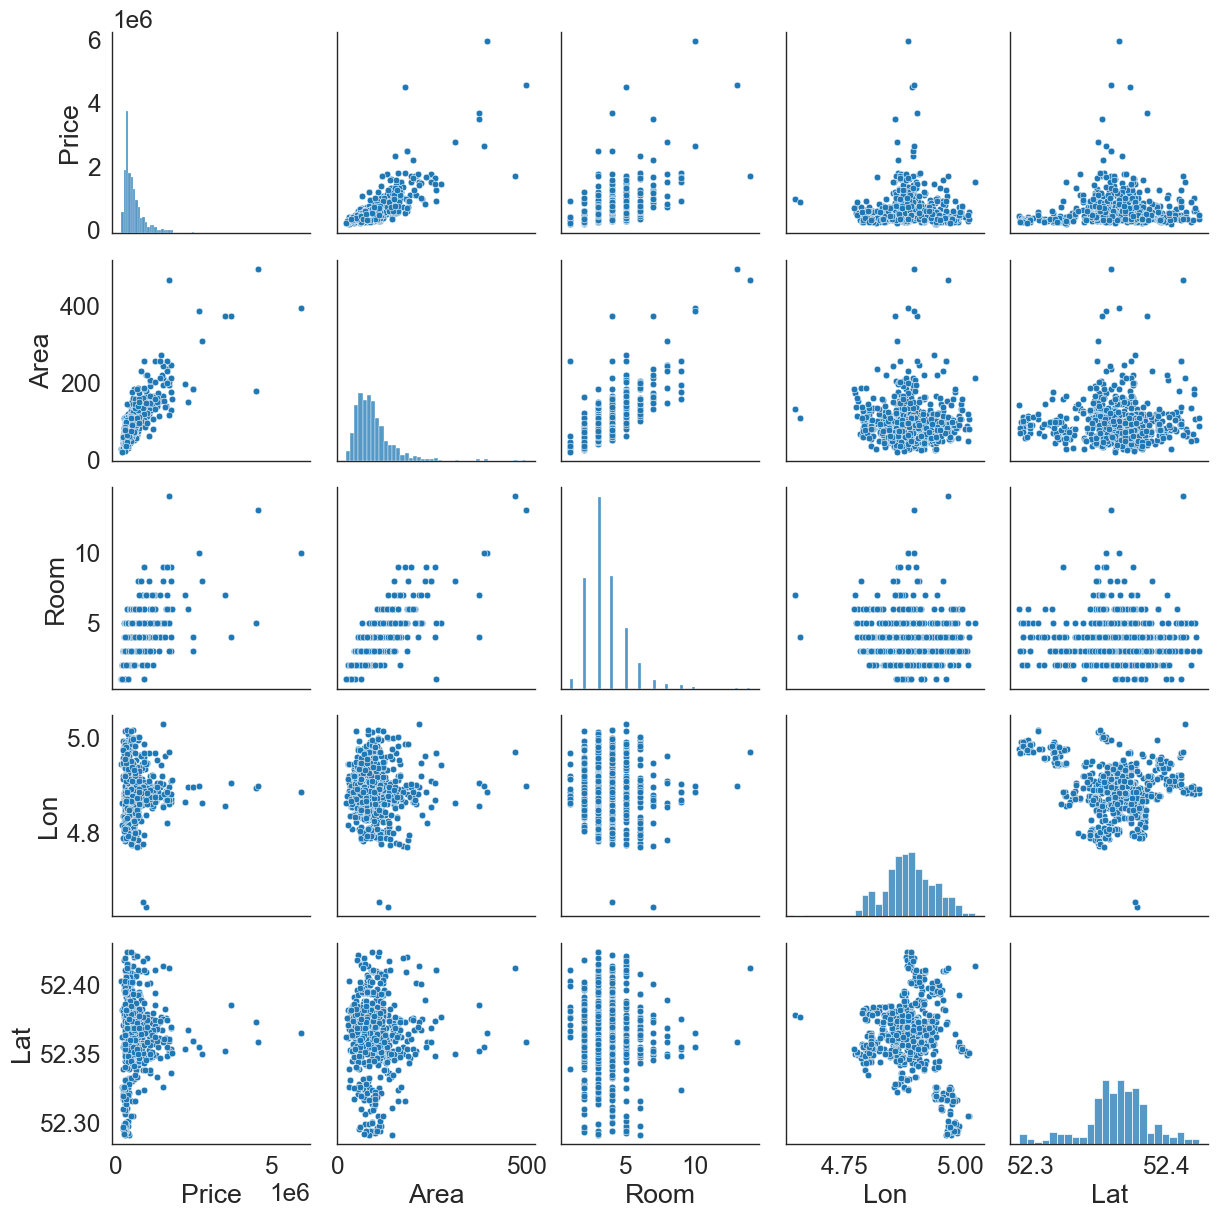

In [ ]:
sns.pairplot(attributes[['Price','Area','Room','Lon','Lat']])

**4. Annotate all information from EDA, such as:**
- the type of data;
- if there are missing values and how to deal with them;
- summary statistics of both numerical and categorical variables;
- the type of distribution; 
- identify the promising transformations you may want to apply (e.g. log-transformation for highly skewed distribution or cluster facets to mitigate group imbalance);
- identify additional data sources that would be useful;
- anything else that is noteworthy for model training.

#### (1) Type of data: 

-- Predictor variables: ['Area','Lon','Lat']-> continous; 'Room' -> Discrete

-- Target variable: 'Price' -> continous 

-- explortary variable for plotting: 'Price per area' -> continous 

-- trasnformed area into bins for explortary analysis -> Ordinal (low, medium, high)


#### (2) Missing data: 

-- 4 out of 739 observations (0.54%) in training data were missing under seed 42, for R1 exercise I removed those missing data and then performed analysis. However, when it might be a large proportionate of data missing in target/ predictor values, probably need to think about imputing mean/ median according to the model selection 


#### (3) summary statistics of both numerical and categorical variables;


In [ ]:
# numerical 
attributes. describe()

,Price,Area,Room,Lon,Lat,price_per_area
count,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000
mean,6.059297e+05,93.965986,3.538776,4.888894,52.363140,6471.386980
std,4.855627e+05,52.340612,1.498703,0.052899,0.024306,2224.440067
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519,2430.555556
25%,3.500000e+05,60.000000,3.000000,4.856448,52.352030,4617.216117
50%,4.650000e+05,82.000000,3.000000,4.887378,52.364679,6578.947368
75%,6.887500e+05,111.000000,4.000000,4.922458,52.377502,7752.026342
max,5.950000e+06,497.000000,14.000000,5.029122,52.423805,25252.808989


In [ ]:
# Categorical 
# transfer area variable into ordinal value by binning the original numeric variable 
# attributes['area_binned'] = pd.qcut(attributes.Area,3, labels=["low", "medium", "high"])
attributes['area_binned'].value_counts()

low       254
high      241
medium    240
Name: area_binned, dtype: int64

In [ ]:
attributes.groupby(['area_binned']).agg(['count','mean', 'std'])

Price                                Area                         \
            count           mean            std count        mean        std   
area_binned                                                                    
low           254  370816.972441  102757.039811   254   52.562992  10.811444   
medium        240  477929.741667  165583.017644   240   83.970833   8.566451   
high          241  981193.618257  682887.968154   241  147.556017  58.173573   

             Room                       Lon                       Lat  \
            count      mean       std count      mean       std count   
area_binned                                                             
low           254  2.464567  0.703411   254  4.886405  0.041814   254   
medium        240  3.337500  0.683526   240  4.891705  0.056683   240   
high          241  4.871369  1.684503   241  4.888719  0.059169   241   

                                 price_per_area                            
                  mean       std          count         mean          std  
area_binned                                                                
low          52.364322  0.020219            254  7202.942735  1788.863278  
medium       52.361386  0.027670            240  5713.146800  1930.512106  
high         52.363641  0.024671            241  6455.463666  2628.069952

#### (4) the type of distribution

-- from visualisation: price, area seems log-normal distribution; where are Lat seems normal ish

-- from fitter test results indicated most of variables are lognormal, except lat seems following beta distribution(but this variable does not fall into [0,1] interval)

#### (5)identify the promising transformations you may want to apply (e.g. log-transformation for highly skewed distribution or cluster facets to mitigate group imbalance)

Given most of the variables are not at same scale, especially price and area variables seems to be left skewed in the pairplot --> one can standardise the whole dataset as data transformation process.  

This process will facilitate using data that has been scaled to have mean 0 and standard deviation 1. The reason for this is that it puts all variables on the same scale. If we don’t standardise our data then variables with a high variance will completely dominate the estimation of regression coeffients (in turn affecting prediction accuracy).

Another additional benefit I read from books for lasso and Ridge models, they require data to be standardised. Hence, I applied this in R1 when training for regularised regressions 


#### (6)identify additional data sources that would be useful

Possibly needed data at city (zip code granularity) data, involving with population, gdp/ income, transportation, education resource, environmental, map data related. Some of below links give a bit of idea what may be useful. Data like worldbank might be not useful, as it was aggregated at city level, so difficult to pull out and join on existing dataset

https://data.overheid.nl/

https://www.iamsterdam.com/en/business/startupamsterdam/insights-interviews/city-data

https://www.cbs.nl/en-gb/search?q=keyword:key%20figures

https://data.europa.eu/en/news-events/news/explore-datasets-municipality-amsterdam

#### (7) anything else that is noteworthy for model training.

Did not think of more to take care of, need to discuss in person (e.g., how to treat extreme cases in training set)

In [28]:
# # creating unit value for target variable for later visualisation 
# attributes['price_per_area'] = attributes['Price'] / attributes['Area']


#Used qcut to ensure binning more of less more evenly distributed (insted of cut might caused to skew towards low area bin). 
# Current output has NA, where final output at the end has removed NA
    # # transfer area variable into ordinal value by binning the original numeric variable 
    # df_train['area_binned'] = pd.qcut(df_train.Area,3, labels=["low", "medium", "high"])
    # # attributes['area_binned'] = pd.cut(attributes.Area,bins=3,labels=["low", "medium", "high"],duplicates='raise', ordered=True)


    # # attributes['area_binned'].value_counts()
    # print(df_train.groupby(['area_binned']).agg(['count','mean', 'std']))